In [1]:
from os import listdir, walk, system
from os.path import isfile, isdir, join

import pandas as pd
import numpy as np

import hdf5_getters

In [2]:
#Obtain paths for all the HDF5 files to look through
base_directory = 'MillionSongSubset/data/'
songs = []
for res in walk(base_directory):
    songs = songs + [join(res[0], file) for file in res[2]]
print songs[:20]

['MillionSongSubset/data/B/I/I/TRBIICD128F14553D8.h5', 'MillionSongSubset/data/B/I/I/TRBIIXI128F9344121.h5', 'MillionSongSubset/data/B/I/I/TRBIIUC128F931B59E.h5', 'MillionSongSubset/data/B/I/I/TRBIIOT128F423C594.h5', 'MillionSongSubset/data/B/I/I/TRBIISJ128F14AE61C.h5', 'MillionSongSubset/data/B/I/I/TRBIIEU128F9307C88.h5', 'MillionSongSubset/data/B/I/I/TRBIIJY12903CE4755.h5', 'MillionSongSubset/data/B/I/I/TRBIIJX128F933AB7D.h5', 'MillionSongSubset/data/B/I/I/TRBIIAL128F4252C04.h5', 'MillionSongSubset/data/B/I/H/TRBIHKT128F4290554.h5', 'MillionSongSubset/data/B/I/H/TRBIHVW128F4233965.h5', 'MillionSongSubset/data/B/I/H/TRBIHQM128F92F83BA.h5', 'MillionSongSubset/data/B/I/H/TRBIHHY128F9306343.h5', 'MillionSongSubset/data/B/I/H/TRBIHAU128F425C317.h5', 'MillionSongSubset/data/B/I/H/TRBIHGD128F92E8D12.h5', 'MillionSongSubset/data/B/I/H/TRBIHOC12903CE371C.h5', 'MillionSongSubset/data/B/I/H/TRBIHMZ128F42B7CF3.h5', 'MillionSongSubset/data/B/I/H/TRBIHKE128F9309555.h5', 'MillionSongSubset/data/B/I

In [3]:
table = []
for song in songs:
    h5 = hdf5_getters.open_h5_file_read(song)
    artist = hdf5_getters.get_artist_name(h5)
    artist_tags = ' '.join(hdf5_getters.get_artist_mbtags(h5))
    artist_terms = ' '.join(hdf5_getters.get_artist_terms(h5))
    beats_num = len(hdf5_getters.get_beats_start(h5))
    danceability = hdf5_getters.get_danceability(h5)
    duration = hdf5_getters.get_duration(h5)
    energy = hdf5_getters.get_energy(h5)
    hotttness = hdf5_getters.get_song_hotttnesss(h5)
    key = hdf5_getters.get_key(h5)
    key_confidence = hdf5_getters.get_key_confidence(h5)
    loudness = hdf5_getters.get_loudness(h5)
    mode = hdf5_getters.get_mode(h5)
    mode_confidence = hdf5_getters.get_mode_confidence(h5)
    release = hdf5_getters.get_release(h5)
    segments_num = len(hdf5_getters.get_segments_start(h5))
    tatums_num = len(hdf5_getters.get_tatums_start(h5))
    tempo = hdf5_getters.get_tempo(h5)
    time_sig = hdf5_getters.get_time_signature(h5)
    time_sig_confidence = hdf5_getters.get_time_signature_confidence(h5)
    title = hdf5_getters.get_title(h5)
    track_id = hdf5_getters.get_track_id(h5)
    year = hdf5_getters.get_year(h5)

    table.append([artist, artist_tags, artist_terms, beats_num, danceability, duration, energy, hotttness, key, 
                  key_confidence, loudness, mode, mode_confidence, release, segments_num, tatums_num, tempo, 
                  time_sig, time_sig_confidence, title, track_id, year])
    h5.close()
    
print len(table)

10000


In [4]:
song_array = np.array(table)
df_columns = ['Artist', 'ArtistTags', 'ArtistTerms', 'NumBeats', 'Danceability', 
                                'Duration', 'Energy', 'Hotttness', 
                                'Key', 'KeyConfidence', 'Loudness', 'Mode', 'ModeConfidence',
                                'Release', 'NumSegments', 'NumTatums', 
                                'Tempo', 'TimeSignature', 'TimeSignatureConfidence',
                                'Title', 'TrackID', 'Year']
song_df = pd.DataFrame(data=song_array, columns=df_columns)

In [5]:
#From December 2010
song_df.head(5)

,Artist,ArtistTags,ArtistTerms,NumBeats,Danceability,Duration,Energy,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,
0,Daara J,world,afrobeat reggae hip hop rap conscious world ja...,394,0.0,261.61587,0.0,0.319565986883,0,0.741,-7.727,1,0.612,Boomerang,1137,1575,91.005,4,1.0,Le Precipice,...
1,Chantal Chamandy,,dance pop tech house electronic house disco wo...,358,0.0,256.15628,0.0,nan,11,0.679,-7.489,0,0.751,Beladi,1048,1432,84.96,4,0.38,Zindegi,...
2,Kaskaad,,dubstep dub electronica experimental neurofunk,603,0.0,414.9024,0.0,nan,4,0.868,-6.239,0,0.718,Kaskaad - Mohawk Hunt / Earuption,2030,2414,87.507,4,1.0,Mohawk Hunt,...
3,Joy Division,post-punk uk british new wave english 80s goth...,alternative indie gothic rock guitar soundtrac...,352,0.0,141.08689,0.0,nan,2,0.239,-6.021,1,0.139,Let The Movie Begin,395,702,150.04,4,1.0,Leaders Of Men,...
4,Don Francisco,,ccm southern gospel christian rock folk-pop de...,346,0.0,311.2224,0.0,0.0,0,0.665,-16.294,1,0.561,Genesis And Job,595,692,68.537,1,0.0,Overture (Genesis & Job),...


In [6]:
print song_df.dtypes
song_df[['NumBeats', 'Key', 'Mode', 'NumSegments', 'NumTatums', 'TimeSignature', 'Year']] = \
    song_df[['NumBeats', 'Key', 'Mode', 'NumSegments', 'NumTatums', 'TimeSignature', 'Year']].astype(int)
song_df[['Danceability', 'Duration', 'Energy', 'Hotttness', 'KeyConfidence', 
         'Loudness', 'ModeConfidence', 'Tempo', 'TimeSignatureConfidence']] = \
    song_df[['Danceability', 'Duration', 'Energy', 'Hotttness', 'KeyConfidence', 
             'Loudness', 'ModeConfidence', 'Tempo', 'TimeSignatureConfidence']].astype(float)
print song_df.dtypes

Artist                     object
ArtistTags                 object
ArtistTerms                object
NumBeats                   object
Danceability               object
Duration                   object
Energy                     object
Hotttness                  object
Key                        object
KeyConfidence              object
Loudness                   object
Mode                       object
ModeConfidence             object
Release                    object
NumSegments                object
NumTatums                  object
Tempo                      object
TimeSignature              object
TimeSignatureConfidence    object
Title                      object
TrackID                    object
Year                       object
dtype: object
Artist                      object
ArtistTags                  object
ArtistTerms                 object
NumBeats                     int64
Danceability               float64
Duration                   float64
Energy                     f

In [7]:
print song_df.Energy.unique()
print song_df.Danceability.unique()
print song_df.TimeSignature.unique()
song_df = song_df.drop(['Danceability', 'Energy'], axis=1)

[ 0.]
[ 0.]
[4 1 3 7 5 0]


In [8]:
song_df.describe()

,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Year
count,10000.000000,10000.000000,5648.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,480.994500,238.507518,0.342822,5.276100,0.449573,-10.485668,0.691100,0.477784,857.740600,1047.948100,122.915449,3.564800,0.509937,934.704600
std,273.768992,114.137514,0.247220,3.554087,0.274974,5.399788,0.462063,0.191254,490.003715,579.776755,35.184412,1.266239,0.373409,996.650657
min,0.000000,1.044440,0.000000,0.000000,0.000000,-51.643000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,317.000000,176.032200,0.000000,2.000000,0.225000,-13.163250,0.000000,0.360000,563.000000,673.000000,96.965750,3.000000,0.097750,0.000000
50%,434.000000,223.059140,0.360371,5.000000,0.469000,-9.380000,1.000000,0.487000,766.500000,953.000000,120.161000,4.000000,0.551000,0.000000
75%,588.000000,276.375060,0.537504,8.000000,0.659000,-6.532500,1.000000,0.606000,1029.250000,1310.000000,144.013250,4.000000,0.864000,2000.000000
max,7880.000000,1819.767710,1.000000,11.000000,1.000000,0.566000,1.000000,1.000000,8419.000000,8201.000000,262.828000,7.000000,1.000000,2010.000000


In [9]:
song_df[(song_df.Duration > 1000) & (song_df.Hotttness > 0.5)]

,Artist,ArtistTags,ArtistTerms,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,TrackID,Year
226,Vangelis,greek electronic instrumental soundtrack new a...,progressive rock electronica experimental clas...,1888,1280.88771,0.655953,8,0.200,-15.357,0,0.351,3 Originals,2713,5665,88.341,7,0.694,Heaven And Hell (Part II),TRBHDSW128F42ABC12,0
1865,Groundhogs,60s 70s blues trio british english 80s classic...,blues-rock electric blues hard rock blues heav...,2190,1023.86893,0.558022,4,0.327,-13.806,1,0.274,U.S. Tour '72,3035,4379,126.570,3,0.555,Still a Fool,TRBGSJX128F92F863D,1968
4841,M83,shoegaze electronic dance and electronica,shoegaze electronic rock pop ambient synth fre...,1605,1071.88200,0.699427,4,0.879,-6.100,0,0.707,M83,1667,3209,90.264,4,0.757,I'm Happy She Said,TRASBSO128F1465A78,2001
9106,Ministry of Sound,uk british english dance and electronica,big beat breakbeat trip hop electro downtempo ...,2425,1686.75220,0.531722,1,0.632,-7.661,1,0.518,Bitesize - Electro Beats,8419,7275,85.958,3,1.000,Bitesize - Electro Beats Mix,TRANFLR128F931CF30,0


In [10]:
song_df[(song_df.NumBeats > 5000) | (song_df.NumTatums > 7000)]

,Artist,ArtistTags,ArtistTerms,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,TrackID,Year
1813,Erik Berglund,,folk-pop meditation pop piano new age spiritua...,7880,1815.22240,0.000000,0,0.573,-11.534,1,0.734,Endless Light,4536,7880,262.828,7,0.350,Endless Light,TRBGYHC12903D0626A,0
1888,UFO,latvian,heavy metal hard rock blues-rock gangster rap ...,4100,1819.76771,NaN,2,0.601,-14.402,1,0.475,"Parker's Birthday ""Live in Texas",5606,8201,134.531,4,0.493,Electric Phase / Hot 'n' Ready / Pack It Up 'n...,TRBGBIZ12903CB26BA,0
8961,Frederic Galliano,,future jazz tribal house broken beat tech hous...,1875,1394.75546,NaN,10,0.313,-20.282,0,0.407,Espaces Baroques,5165,7502,81.983,4,0.772,Nomades Monades,TRANLLL128F42268D9,1997
9106,Ministry of Sound,uk british english dance and electronica,big beat breakbeat trip hop electro downtempo ...,2425,1686.75220,0.531722,1,0.632,-7.661,1,0.518,Bitesize - Electro Beats,8419,7275,85.958,3,1.000,Bitesize - Electro Beats Mix,TRANFLR128F931CF30,0


In [11]:
song_df[(song_df.TimeSignature == 7) & (song_df.Hotttness >= 0.67)].sort('Duration', ascending=True)

,Artist,ArtistTags,ArtistTerms,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,TrackID,Year
2707,Angelo Badalamenti,soundtrack american,chill-out soundtrack symphony neoclassical dar...,123,86.56934,0.674834,1,0.267,-23.476,0,0.348,Mulholland Drive,209,370,90.336,7,0.000,Dinner Party Pool Music,TRAIYWQ128F426BC5C,2001
4021,Agnostic Front,punk new york usa,hardcore punk heavy metal new york punk hardco...,363,122.17424,0.704650,2,0.312,-5.218,1,0.430,Warriors,478,726,185.453,7,0.716,Come Alive,TRARACF128F424FACF,2007
8989,9th Wonder,,hip hop alternative hip hop beat turnablism ra...,530,184.92036,0.703966,6,0.179,-6.012,0,0.282,The Dream Merchant 2,883,1060,171.968,7,0.181,Saved,TRANZHO128F4289A58,0
9237,M83,shoegaze electronic dance and electronica,shoegaze electronic rock pop ambient synth fre...,355,219.24526,0.852089,7,0.446,-11.451,1,0.569,Saturdays = Youth,335,709,96.047,7,0.841,You Appearing,TRAPCNK128F427D7B5,2008
2289,Lupe Fiasco,hip hop rnb and dance hall rapper hip-hop,hip hop rap soul chicago alternative rap midwe...,700,226.66404,0.878620,5,0.546,-5.303,1,0.418,Lupe Fiasco's Food & Liquor,993,1401,188.018,7,1.000,The Cool (Amended Album Version),TRBFEID128F42368AC,0
2443,Dimmu Borgir,norwegian black metal melodic black metal symp...,black metal death metal heavy metal metal extr...,642,259.02975,0.681975,10,0.039,-3.561,1,0.208,In Sorte Diaboli,699,1285,150.064,7,0.513,The Chosen Legacy,TRAQHOI128F4233163,2007
7021,Blackbyrds,,jazz funk funk jazz los angeles soul californi...,1058,325.92934,0.725725,5,0.061,-7.863,0,0.529,Happy Music: The Best Of The Blackbyrds,1393,2116,194.922,7,0.852,Do It_ Fluid,TRAZXBO128F429DA70,0
6000,Thrice,,post-hardcore emo rock experimental metalcore ...,695,329.71710,0.838287,9,0.585,-9.458,0,0.541,Live At The House Of Blues,839,1389,126.947,7,0.957,The Earth Will Shake,TRALDDK128F9300AC5,2005
9430,Jason Mraz,pop rock alternative rock rock american classi...,alternative rock rock surf music pop hip hop r...,2134,740.46649,0.681547,11,0.537,-10.798,0,0.615,Selections For Friends,2364,4270,173.468,7,0.796,Song For A Friend (Live From Montalvo),TRAPUWG128EF3425E7,2007


In [12]:
def notesFromChroma(chroma, threshold, letters=True):
    if(letters):
        notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    else:
        notes = range(12)
    sorted_by_val = sorted(enumerate(chroma), key=(lambda x: x[1]))
    top_pairs = [note_pair for note_pair in sorted_by_val if note_pair[1] > threshold]
    return [notes[index] for index in [val[0] for val in top_pairs]]

In [13]:
#M83 "You Appearing"
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/P/C/TRAPCNK128F427D7B5.h5')
chroma = hdf5_getters.get_segments_pitches(h5)
onsets = hdf5_getters.get_segments_start(h5)
loudness = hdf5_getters.get_segments_loudness_max(h5)
h5.close()

#Chroma features: http://labrosa.ee.columbia.edu/matlab/chroma-ansyn/
for i in range(20):
    print notesFromChroma(chroma[i], 0.1), onsets[i], loudness[i]
#E D F# B
#G F# D B D D D D G-F#

['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 0.0 -60.0
['G', 'E'] 0.98417 -22.373
['G', 'D'] 2.2137 -22.597
['D', 'G'] 3.49732 -31.042
['D#', 'B'] 4.74644 -25.625
['B', 'D', 'G'] 5.9942 -28.307
['D', 'E'] 7.2541 -31.192
['B', 'D', 'E'] 7.86961 -29.12
['F#', 'D#', 'B'] 8.48943 -24.365
['B', 'D', 'G'] 9.75061 -28.455
['G', 'E'] 10.99265 -22.433
['G', 'D'] 12.19311 -22.758
['A', 'D', 'G'] 13.4995 -30.983
['F#', 'G#', 'A', 'D', 'G'] 14.12168 -33.114
['D#', 'C', 'B'] 14.74141 -25.717
['D#', 'B'] 15.0615 -28.723
['B', 'D', 'G'] 15.99365 -28.144
['D', 'E'] 17.24998 -30.669
['D', 'B', 'E'] 17.87143 -23.506
['F#', 'D#', 'B'] 18.4912 -24.095


In [14]:
import stm
def segments_to_midi(hdf5_file, volume_cutoff=15):
    title = hdf5_getters.get_title(hdf5_file)
    pitches = hdf5_getters.get_segments_pitches(hdf5_file)
    onsets = hdf5_getters.get_segments_start(hdf5_file)
    volumes = hdf5_getters.get_segments_loudness_max(hdf5_file)
    song_duration = hdf5_getters.get_duration(hdf5_file)
    
    stm.segments_to_midi(title, pitches, onsets, volumes, volume_cutoff, song_duration)

In [15]:
#M83 - You Appearing
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/P/C/TRAPCNK128F427D7B5.h5')
segments_to_midi(h5, volume_cutoff=10)
h5.close()
#Using Perfect Sine soundfont http://www.flstudiomusic.com/2011/12/20-synth-soundfonts.html
!timidity ChromaMIDIs/You\ Appearing.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/You Appearing.mid
MIDI file: ChromaMIDIs/You Appearing.mid
Format: 1  Tracks: 1  Divisions: 960
Sequence: Main Track
^CTerminated sig=0x02



stm.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(onsets == None):
stm.py:11: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(volumes == None):


In [16]:
q = song_df.Artist.map(lambda x: 'boards' in x.lower())
song_df[q]

,Artist,ArtistTags,ArtistTerms,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,TrackID,Year
3852,Boards of Canada,electronic british idm uk dance and electronic...,trip hop intelligent dance music electronica t...,770,472.52853,0.685474,7,0.087,-13.207,0,0.427,Music Has The Right To Children,1869,1539,100.013,4,0.831,Happy Cycling,TRAHUGQ128F92FF08F,1996


In [17]:
#Boards of Canada - Happy Cycling
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/H/U/TRAHUGQ128F92FF08F.h5')
segments_to_midi(h5, volume_cutoff=14)
h5.close()
#In lmms if ugly scratching noises try changing tempo and changing it back
!timidity ChromaMIDIs/Happy\ Cycling.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/Happy Cycling.mid
MIDI file: ChromaMIDIs/Happy Cycling.mid
Format: 1  Tracks: 1  Divisions: 960
Sequence: Main Track
^CTerminated sig=0x02



In [18]:
q = song_df.Artist.map(lambda x: 'little eva' in x.lower())
song_df[q]

,Artist,ArtistTags,ArtistTerms,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,TrackID,Year
2419,Little Eva,,pop rock all-female ballad europop doo-wop sof...,201,149.65506,NaN,0,0.000,-3.375,0,0.000,Girls of the 60's,501,604,84.758,1,0.537,The Loco Motion,TRAQVSH128F92EF9A5,2000
5498,Little Eva,,pop rock all-female ballad europop doo-wop sof...,313,145.16200,0.928367,3,0.655,-6.643,1,0.543,The Loco-Motion,541,625,129.781,1,0.247,The Loco-Motion,TRADZQV128F14A5760,1962
8771,Little Eva,,pop rock all-female ballad europop doo-wop sof...,341,171.78077,0.425340,1,0.671,-7.517,1,0.705,The Dimension Dolls,604,682,120.026,4,0.550,Up On The Roof (LP Version),TRAMNUT128F14B07A9,0


In [19]:
#Little Eva - The Loco-Motion
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/D/Z/TRADZQV128F14A5760.h5')
segments_to_midi(h5, volume_cutoff=15)
h5.close()
!timidity ChromaMIDIs/The\ Loco-Motion.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/The Loco-Motion.mid
MIDI file: ChromaMIDIs/The Loco-Motion.mid
Format: 1  Tracks: 1  Divisions: 960
Sequence: Main Track
^CTerminated sig=0x02



In [20]:
#Piano hits, Release Field: Chopin (for Ravel incidentally), Faure, Bach 
q = song_df.ArtistTerms.map(lambda x: (('pianist' in x.lower() or 'piano' in x.lower())
                                       and ('classical' in x.lower())
                                       and ('rock' not in x.lower())
                                       and ('meditation' not in x.lower())
                                      )
                           )
song_df[q]

,Artist,ArtistTags,ArtistTerms,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,TrackID,Year
32,Sir Neville Marriner,conductor,requiem concerto symphony opera orchestra clas...,300,296.80281,0.588922,7,0.651,-21.254,1,0.628,Mozart: Academy in Concert,558,599,61.634,5,0.527,Two Elegiac Melodies Op. 34: 2. The Last Spring,TRBIBSS128F14A205E,0
136,Pierre Boulez,classical,classical serialism contemporary electronic ex...,1308,530.70322,NaN,8,0.082,-16.958,0,0.000,Messiaen : Edition,614,1308,152.986,4,0.627,Messiaen : Et exspecto resurrectionem mortuoru...,TRBHIDP128F147DE7D,0
569,Henry Mancini,american soundtrack composer soundtrack clevel...,instrumental pop lounge soundtrack space age p...,359,187.74159,0.000000,5,0.029,-11.088,1,0.345,Sousa In Hi-Fi,534,719,118.719,4,0.541,National Fencibles March,TRBCJKE12903CE3A8B,0
628,Eduardo Fernandez,,classical guitar classic acoustic guitar conce...,247,120.89424,0.000000,4,0.689,-28.547,1,0.461,The Spanish Guitar - The Top 10,425,494,127.949,1,0.000,Estudio,TRBCEYG128F1478610,0
639,Dario Marianelli,italian european,symphony chill-out chamber pop neoclassical ea...,670,262.94812,0.212045,7,0.876,-25.369,0,0.792,Everybody's Fine,390,670,162.487,4,0.589,Why Did You All Lie to Me?,TRBCGKB12903CFF680,2009
680,David Benoit,,nu jazz jazz contemporary jazz classical beat ...,684,274.10240,0.544577,0,0.413,-10.030,1,0.465,Here's To You Charlie Brown - 50 Great Years!,975,1368,152.077,5,0.570,Frieda,TRBCPKL128F42A97A4,2000
980,Russ Morgan,,orchestra vaudeville ragtime easy listening ja...,208,149.00200,NaN,5,0.642,-11.658,0,0.449,Russ Morgan At Catalina (Digitally Remastered),439,417,84.818,4,0.226,Do You Ever Think Of Me,TRBDQAX12903CFD642,0
1237,Russ Morgan,,orchestra vaudeville ragtime easy listening ja...,117,138.03057,NaN,10,0.894,-18.339,1,0.723,Nearer My God To Thee (Digitally Remastered),146,117,53.713,1,0.000,Love Divine_ All Love Excelling,TRBDFRL12903CFD5A1,0
1257,Joshua Rifkin,,ragtime easy listening jazz classical baroque ...,593,229.53751,NaN,7,0.740,-25.342,1,0.762,Scott Joplin Piano Rags,786,1186,158.569,1,0.000,Paragon Rag (LP Version),TRBDUXF128F4232689,1994
1258,Russ Morgan,,orchestra vaudeville ragtime easy listening ja...,407,212.63628,NaN,7,0.211,-10.503,0,0.266,Russ Morgan At Catalina (Digitally Remastered),669,815,116.587,4,0.029,The Moon Was Yellow,TRBAQCD12903CFD63C,0


In [21]:
q = song_df.Release.map(lambda x: ('bach' in x.lower()))
song_df[q]

,Artist,ArtistTags,ArtistTerms,NumBeats,Duration,Hotttness,Key,KeyConfidence,Loudness,Mode,ModeConfidence,Release,NumSegments,NumTatums,Tempo,TimeSignature,TimeSignatureConfidence,Title,TrackID,Year
73,Public Image Ltd,uk british english rock and indie punk england...,dance rock alternative dance experimental rock...,530,251.50649,0.873619,9,0.007,-10.347,0,0.243,Valse Avec Bachir,741,1060,127.369,4,0.000,This Is Not A Love Song,TRBIAHA128F42A4C9B,1983
510,Camerata Brasil,,choro samba batucada europop ballad brazilian ...,828,282.35710,0.205175,5,0.247,-15.189,1,0.315,Bach in Brazil,1142,1657,179.803,4,0.000,Italian Concerto in F_ BWV 971 - Allegro,TRBCTCQ128F427DE9A,0
725,Henri Rene And His Orchestra,,space age pop easy listening orchestra jazz vocal,310,168.54159,NaN,3,0.138,-16.797,1,0.340,Ultra-Lounge / A Bachelor In Paris - Volume Ten,439,620,112.911,1,0.548,Petite Fleur (Instrumental) (1996 Digital Rema...,TRBBYQM128F1468524,0
2837,Steve Erquiaga,,smooth jazz folk rock downtempo classical folk...,350,184.29342,0.557188,4,0.663,-23.966,0,0.625,The Bach Variations,654,699,116.949,1,0.000,Prelude In C Minor From The Well Tempered-Clavier,TRAIWMZ128F428B6D8,0
4194,Alan Feinberg,,contemporary classical music tango jazz sonata...,166,155.19302,NaN,11,0.464,-28.327,0,0.539,Music To My Ears_ A Collection of Music for Ch...,237,331,70.100,3,0.737,Menuet in the Name of Haydn,TRATVGT128F9310C89,0
4319,Lionel Rogg,,early music easy listening los angeles baroque...,689,394.23955,NaN,0,0.608,-16.536,1,0.750,J. S. Bach: The Art of Fugue & 'Vivaldi' Solo ...,1146,1378,106.479,1,0.000,Concerto in C major_ BWV 594 (after Vivaldi Op...,TRATXBC128EF34B540,0
5391,Lionel Rogg,,early music easy listening los angeles baroque...,756,499.51302,0.212045,2,0.639,-15.872,0,0.721,Bach: Favorite Organ Works,1156,1511,92.924,4,0.500,Toccata Et Fugue En Ré Mineur BWV 565,TRADRWF128F425F7BE,0
5520,Lionel Rogg,,early music easy listening los angeles baroque...,174,137.32526,0.255833,0,0.725,-10.997,1,0.846,Bach: Organ Works Vol.2,261,522,77.754,3,0.678,Prelude And Fugue In C Major BWV 545 : Prelude,TRADKPT12903C980B3,0
6684,Lionel Rogg,,early music easy listening los angeles baroque...,251,240.61342,NaN,0,0.314,-14.367,1,0.601,Bach: Organ Works Vol.2,594,752,64.401,4,0.000,Prelude And Fugue In C Major BWV 531 : Fugue,TRAAZJU12903C980B6,0
6711,Brazilian Tropical Orchestra,,bossa nova orchestra latin jazz easy listening...,753,192.44363,0.000000,5,0.084,-10.229,1,0.405,American Songbook - Bacharach,453,753,236.006,4,0.761,One Less Bell To Answer,TRAAKQS128F4224DE1,0


In [22]:
#Lionel Rogg/Bach - Toccata and Fugue BWV 565
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/D/R/TRADRWF128F425F7BE.h5')
segments_to_midi(h5, volume_cutoff=15)
h5.close()
!timidity ChromaMIDIs/Toccata\ Et\ Fugue\ En\ Ré\ Mineur\ BWV\ 565.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/Toccata Et Fugue En Ré Mineur BWV 565.mid
MIDI file: ChromaMIDIs/Toccata Et Fugue En Ré Mineur BWV 565.mid
Format: 1  Tracks: 1  Divisions: 960
Sequence: Main Track
^CTerminated sig=0x02



In [24]:
#Alan Feinberg/Ravel - Menuet in the Name of Haydn
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/T/V/TRATVGT128F9310C89.h5')
segments_to_midi(h5)
h5.close()
!timidity ChromaMIDIs/Menuet\ in\ the\ Name\ of\ Haydn.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/Menuet in the Name of Haydn.mid
MIDI file: ChromaMIDIs/Menuet in the Name of Haydn.mid
Format: 1  Tracks: 1  Divisions: 960
Sequence: Main Track
^CTerminated sig=0x02



In [25]:
#Chroma features visualizations
#Smoothing over chromas?
%matplotlib inline
from chromaviz import display_chroma
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

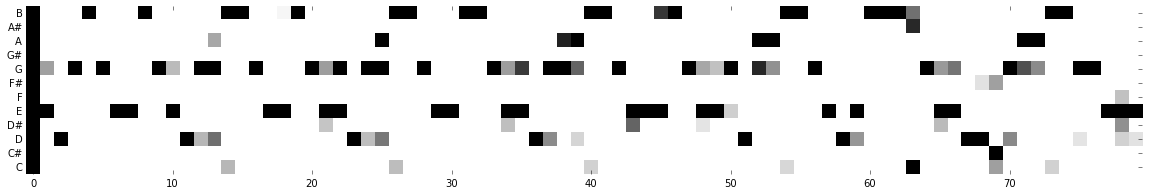

In [26]:
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/P/C/TRAPCNK128F427D7B5.h5')
pitches_m83 = hdf5_getters.get_segments_pitches(h5)
h5.close()
display_chroma(pitches_m83, length=80, strictness=0.8)

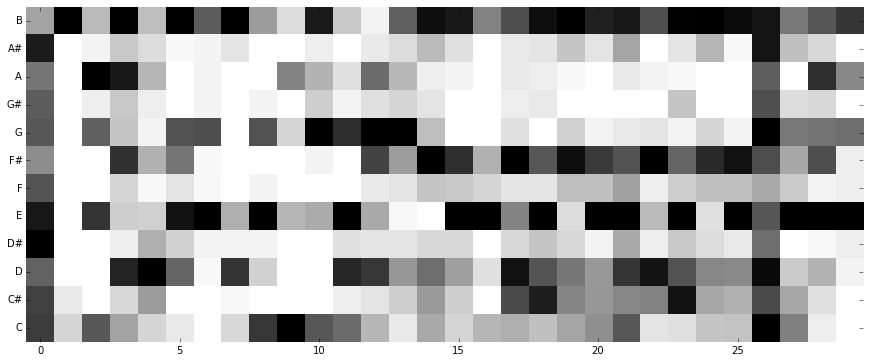

In [27]:
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/T/V/TRATVGT128F9310C89.h5')
pitches_menuet = hdf5_getters.get_segments_pitches(h5)
h5.close()
display_chroma(pitches_menuet)

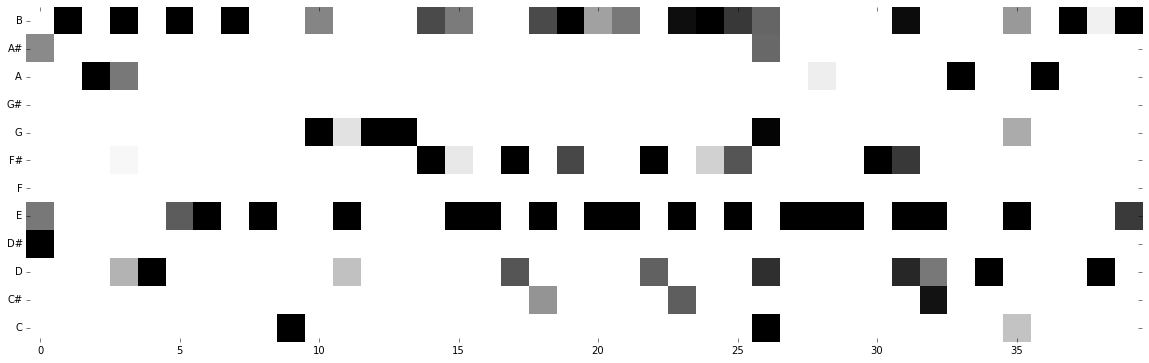

In [28]:
display_chroma(pitches_menuet, length=40, strictness=0.9)

In [29]:
!timidity --adjust-tempo=137 ChromaMIDIs/Menuet\ in\ the\ Name\ of\ Haydn.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/Menuet in the Name of Haydn.mid
MIDI file: ChromaMIDIs/Menuet in the Name of Haydn.mid
Format: 1  Tracks: 1  Divisions: 960
Sequence: Main Track
^CTerminated sig=0x02



In [31]:
!timidity ChromaMIDIs/menuetfullnotchroma.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/menuetfullnotchroma.mid
MIDI file: ChromaMIDIs/menuetfullnotchroma.mid
Format: 1  Tracks: 3  Divisions: 240
Sequence: �@Ravel "Menuet" sur le nom d'HAYDN     Play by Katsuhiro Oguri
Text: CVS Ver5.05 Created
Text: ���x��
Text: �u���k�G�b�g�v
Text: �n�C�h���̖��ɂ��
Text: ���t�@�@���I���T
Track name: PIANO
Text: <RESET>
Text: <Master Volume>
Text: <Master Reverve>
Text: <part reverve>
Copyright: ___________________________________________________

KUNSTDERFUGE.COM LARGE CLASSICAL MIDI COLLECTION
ONCLASSICAL BY ALESSANDRO SIMONETTO, PROPRIETOR
___________________________________________________

! Attention: this file is under copyright !

(c)onclassical, (c)oguri, 2010
___________________________________________________

NO ONE MAY REPUBLISH THIS FILE WITHOUT PERMISSION
COMMERCIAL USES OF THIS FILE IS STRICTLY PROHIBITED
_____________________________________

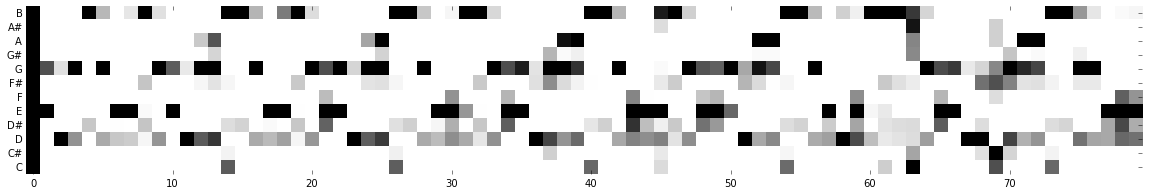

In [32]:
#Fig Leaf Rag
h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/A/J/L/TRAJLGV128F4232684.h5')
segments_to_midi(h5, volume_cutoff=10)
pitches_fig = hdf5_getters.get_segments_pitches(h5)
h5.close()
display_chroma(pitches_m83, length=80, strictness=0.6)

In [34]:
!timidity ChromaMIDIs/Fig\ Leaf\ Rag\ \ \(LP\ Version\).mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/Fig Leaf Rag  (LP Version).mid
MIDI file: ChromaMIDIs/Fig Leaf Rag  (LP Version).mid
Format: 1  Tracks: 1  Divisions: 960
Sequence: Main Track
^CTerminated sig=0x02



In [35]:
!timidity ChromaMIDIs/figleaffullnotchroma.mid

Requested buffer size 32768, fragment size 8192
ALSA pcm 'default' set buffer size 32768, period size 8192 bytes
Playing ChromaMIDIs/figleaffullnotchroma.mid
MIDI file: ChromaMIDIs/figleaffullnotchroma.mid
Format: 1  Tracks: 4  Divisions: 120
Sequence: Fig Leaf Rag
Sequence: by Scott Joplin (1908)
Copyright: Copyright � 1997 by Warren Trachtman
Text: Rights granted to distribute for non-commercial use only.

Text: All Other Rights Reserved

Text: Warren Trachtman

Text: (warren@trachtman.org)

Track name: Fig Leaf Rag
Track name: by Scott Joplin (1908)
Track name: W.S.Trachtman - MIDI file
(A1)^CTerminated sig=0x02



# Write File for PCA

In [36]:
chosen_songs = song_df[song_df.NumSegments > 300][['Artist', 'Title', 'TrackID', 'Key', 'Mode']]
chosen_songs.head(5)

,Artist,Title,TrackID,Key,Mode
0,Daara J,Le Precipice,TRBIICD128F14553D8,0,1
1,Chantal Chamandy,Zindegi,TRBIIXI128F9344121,11,0
2,Kaskaad,Mohawk Hunt,TRBIIUC128F931B59E,4,0
3,Joy Division,Leaders Of Men,TRBIIOT128F423C594,2,1
4,Don Francisco,Overture (Genesis & Job),TRBIISJ128F14AE61C,0,1


In [37]:
#Using commas for delimiters won't cause problems
q1 = chosen_songs.Artist.map(lambda x: ',' in x)
q2 = chosen_songs.Title.map(lambda x: ',' in x)
q3 = chosen_songs.TrackID.map(lambda x: ',' in x)
print len(chosen_songs[q1]), len(chosen_songs[q2]), len(chosen_songs[q3])

0 0 0


In [38]:
#Transposes pitches from song written in key into C
#Example: song is in D. Then want to transpose everything down two semitones, which corresponds
#to shifting elements two places to the left
def transpose(pitches, key):
    if(key == 0):
        return pitches
    permutation = range(key, 12) + range(0, key)
    
    pitches_divided = []
    for i in range(len(pitches)/12):
        pitches_divided.append(pitches[i*12:(i+1)*12])
        
    transposed_divided = [[twelve[i] for i in permutation] for twelve in pitches_divided]
    transposed_flat = []
    for trans_twelve in transposed_divided:
        for pitch in trans_twelve:
            transposed_flat.append(pitch)
    return transposed_flat

In [39]:
transpose([0.1, 0.2, 1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.2, 0.1, 
           0.2, 0.7, 0.1, 0.8, 0.3, 0.1, 0.4, 0.1, 0.5, 0.9, 0.2, 0.6], 2)

[1,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1,
 0.1,
 0.2,
 0.1,
 0.8,
 0.3,
 0.1,
 0.4,
 0.1,
 0.5,
 0.9,
 0.2,
 0.6,
 0.2,
 0.7]

In [42]:
def write_chroma_file(title, numFeats, transposed=True):
    with open(title, 'wb') as file:
        for line in chosen_songs.as_matrix():

            trackID = line[2]
            first_folder = trackID[2]
            second_folder = trackID[3]
            third_folder = trackID[4]

            h5 = hdf5_getters.open_h5_file_read('MillionSongSubset/data/' + first_folder + '/'
                                                + second_folder + '/' + third_folder + '/'
                                                + trackID + '.h5')
            chroma = hdf5_getters.get_segments_pitches(h5)[:numFeats]

            flat_chroma = []
            for octave in chroma:
                for pitch in octave:
                    flat_chroma.append(str(pitch))
            
            if(transposed):
                transposed_chroma = transpose(flat_chroma, line[3])
                chromastring = ','.join(transposed_chroma)

            else:
                chromastring = ','.join(flat_chroma)
                
            file.write(line[0] + ',' + line[1] + ',' + line[2] + ',' + str(line[3]) + ',' + str(line[4])
                       + ',' + chromastring + '\n')
            h5.close()

In [44]:
#write_chroma_file('samplechromas', 300)
#write_chroma_file('samplechromasmini', 50)
#write_chroma_file('samplechromasmediumtransposed', 100)
write_chroma_file('samplechromasmedium', 100, transposed=False)